ADELIO SURYA PUTRA PRATAMA (0706022310039)
YEHEZKIEL CHANDRA PUTRA CAHYONO (0706022310038)

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score



In [8]:
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Bank%20(1).csv"
df = pd.read_csv(url, delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


# PREPROCESSING

In [11]:
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'age': array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
        26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
        51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
        62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84],
       dtype=int64),
 'job': array(['unemployed', 'services', 'management', 'blue-collar',
        'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
        'housemaid', 'retired', 'unknown'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'balance': array([ 1787,  4789,  1350, ...,  -333, -3313,  1137], dtype=int64),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'unknown', 'telephone'], dtype=object),
 'day': array([19, 11

Tidak ada yang akan saya drop karena semua value nya unik

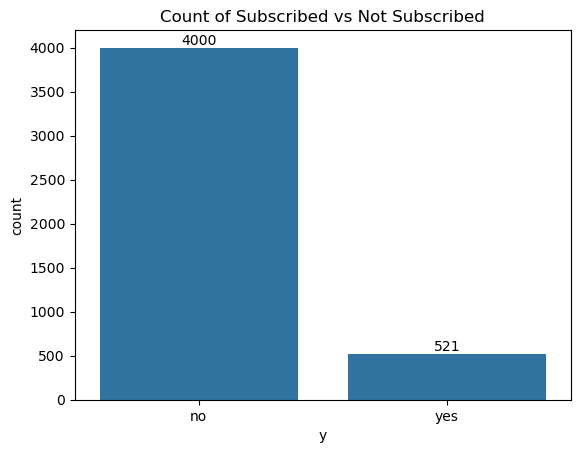

In [12]:
ax = sns.countplot(data=df, x='y')
plt.title('Count of Subscribed vs Not Subscribed')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Feature Encoding

In [19]:
df_encoded = df.copy()

one_hot_map = {
    'default': {'no': 0, 'yes': 1},
    'housing': {'no': 0, 'yes': 1},
    'loan': {'no': 0, 'yes': 1},
    'y': {'no': 0, 'yes': 1}
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)


# Mapping untuk Education
Education_mapping = {'unknown': 0, 'tertiary': 1, 'secondary': 2, 'primary': 3}
df_encoded['education'] = df_encoded['education'].map(Education_mapping)

# Mapping untuk poutcome
Poutcome_mapping = {'unknown': 0, 'failure': 1, 'other': 2, 'success': 3}
df_encoded['poutcome'] = df_encoded['poutcome'].map(Poutcome_mapping)

#Encode Nominal
nominal_cols = ['job', 'marital', 'contact', 'month']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)


{'contact': {'cellular': 0, 'telephone': 1, 'unknown': 2},
 'job': {'admin.': 0,
         'blue-collar': 1,
         'entrepreneur': 2,
         'housemaid': 3,
         'management': 4,
         'retired': 5,
         'self-employed': 6,
         'services': 7,
         'student': 8,
         'technician': 9,
         'unemployed': 10,
         'unknown': 11},
 'marital': {'divorced': 0, 'married': 1, 'single': 2},
 'month': {'apr': 0,
           'aug': 1,
           'dec': 2,
           'feb': 3,
           'jan': 4,
           'jul': 5,
           'jun': 6,
           'mar': 7,
           'may': 8,
           'nov': 9,
           'oct': 10,
           'sep': 11}}


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
301,65,5.0,0.0,3,0,1840,0,0,0.0,1,6.0,383,2,188,5,1,0
3050,31,9.0,2.0,0,0,187,0,0,0.0,17,5.0,86,1,-1,0,0,0
2598,36,1.0,2.0,3,0,367,0,0,0.0,2,3.0,217,1,221,1,1,0
2958,31,7.0,1.0,1,0,309,1,1,2.0,7,8.0,294,1,-1,0,0,0
1832,40,7.0,0.0,2,0,-81,0,1,0.0,23,5.0,186,1,-1,0,0,0


In [20]:
df.loc[1832]

age                 40
job           services
marital       divorced
education    secondary
default             no
balance            -81
housing             no
loan               yes
contact       cellular
day                 23
month              jul
duration           186
campaign             1
pdays               -1
previous             0
poutcome       unknown
y                   no
Name: 1832, dtype: object

## Separate features and target

In [21]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [22]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10.0,1.0,3,0,1787,0,0,0.0,19,10.0,79,1,-1,0,0
1,33,7.0,1.0,2,0,4789,1,1,0.0,11,8.0,220,1,339,4,1
2,35,4.0,2.0,1,0,1350,1,0,0.0,16,0.0,185,1,330,1,1
3,30,4.0,1.0,1,0,1476,1,1,2.0,3,6.0,199,4,-1,0,0
4,59,1.0,1.0,2,0,0,1,0,2.0,5,8.0,226,1,-1,0,0


In [23]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

# Split Data

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
X_train.shape, X_test.shape

((3164, 16), (1357, 16))

# Decision Tree Classifier

In [36]:
xgb = XGBClassifier(random_state=0)


xgb.fit(X_train, y_train)

# Memprediksi hasil untuk data training dan testing
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

# Menampilkan classification report untuk training set
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

# Menampilkan classification report untuk test set
print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2810
           1       1.00      1.00      1.00       354

    accuracy                           1.00      3164
   macro avg       1.00      1.00      1.00      3164
weighted avg       1.00      1.00      1.00      3164


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1190
           1       0.60      0.39      0.47       167

    accuracy                           0.89      1357
   macro avg       0.76      0.68      0.71      1357
weighted avg       0.88      0.89      0.88      1357



In [38]:
# Membuat model Random Forest
rf = RandomForestClassifier(random_state=0)

# Melatih model dengan data training
rf.fit(X_train, y_train)

# Memprediksi hasil untuk data training dan testing
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Menampilkan classification report untuk training set
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

# Menampilkan classification report untuk test set
print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2810
           1       1.00      1.00      1.00       354

    accuracy                           1.00      3164
   macro avg       1.00      1.00      1.00      3164
weighted avg       1.00      1.00      1.00      3164


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1190
           1       0.56      0.28      0.37       167

    accuracy                           0.88      1357
   macro avg       0.73      0.63      0.66      1357
weighted avg       0.86      0.88      0.87      1357



In [39]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2810
           1       1.00      1.00      1.00       354

    accuracy                           1.00      3164
   macro avg       1.00      1.00      1.00      3164
weighted avg       1.00      1.00      1.00      3164


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1190
           1       0.41      0.37      0.39       167

    accuracy                           0.86      1357
   macro avg       0.66      0.65      0.65      1357
weighted avg       0.85      0.86      0.85      1357



SMOTEMC

In [44]:
categorical_features = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'poutcome',
]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 16), (2400, 16))

# Decision Tree After SMOTE MC

In [65]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

gb_model = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)

print("Best Parameters:", best_params)
print(f"Best Model Accuracy: {accuracy_best}")

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}
Best Model Accuracy: 0.9254166666666667


In [69]:
xgb = XGBClassifier(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    random_state=0
)

# Melatih model dengan data training
xgb.fit(X_train, y_train)

# Memprediksi hasil untuk data training dan testing
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)


print("\n=== XGBOOST Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))


print("\n=== XGBOOST Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== XGBOOST Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== XGBOOST Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1192
           1       0.92      0.95      0.93      1208

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



In [56]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

Best Parameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Estimator: RandomForestClassifier(bootstrap=False, max_depth=30, n_estimators=200)


In [ ]:
# Menggunakan model terbaik dari GridSearchCV
rf = grid_search.best_estimator_

# Melatih model dengan data training
rf.fit(X_train, y_train)

# Memprediksi hasil untuk data training dan testing
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)


print("\n=== Random Forest Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))


print("\n=== Random Forest Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Random Forest Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Random Forest Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1192
           1       0.92      0.94      0.93      1208

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



In [59]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1192
           1       0.86      0.89      0.87      1208

    accuracy                           0.87      2400
   macro avg       0.87      0.87      0.87      2400
weighted avg       0.87      0.87      0.87      2400



In [71]:
# Data from the classification reports
data = {
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.87, 0.93, 0.93],  # Replace with actual accuracy values
    'Precision': [0.87, 0.93, 0.93],  # Replace with actual precision values
    'Recall': [0.87, 0.93, 0.93],  # Replace with actual recall values
    'F1-score': [0.87, 0.93, 0.93]  # Replace with actual F1-score values
}

# Create a DataFrame
df_metrics = pd.DataFrame(data)

# Display the table in Jupyter notebook
df_metrics


,Model,Accuracy,Precision,Recall,F1-score
0,Decision Tree,0.87,0.87,0.87,0.87
1,Random Forest,0.93,0.93,0.93,0.93
2,XGBoost,0.93,0.93,0.93,0.93


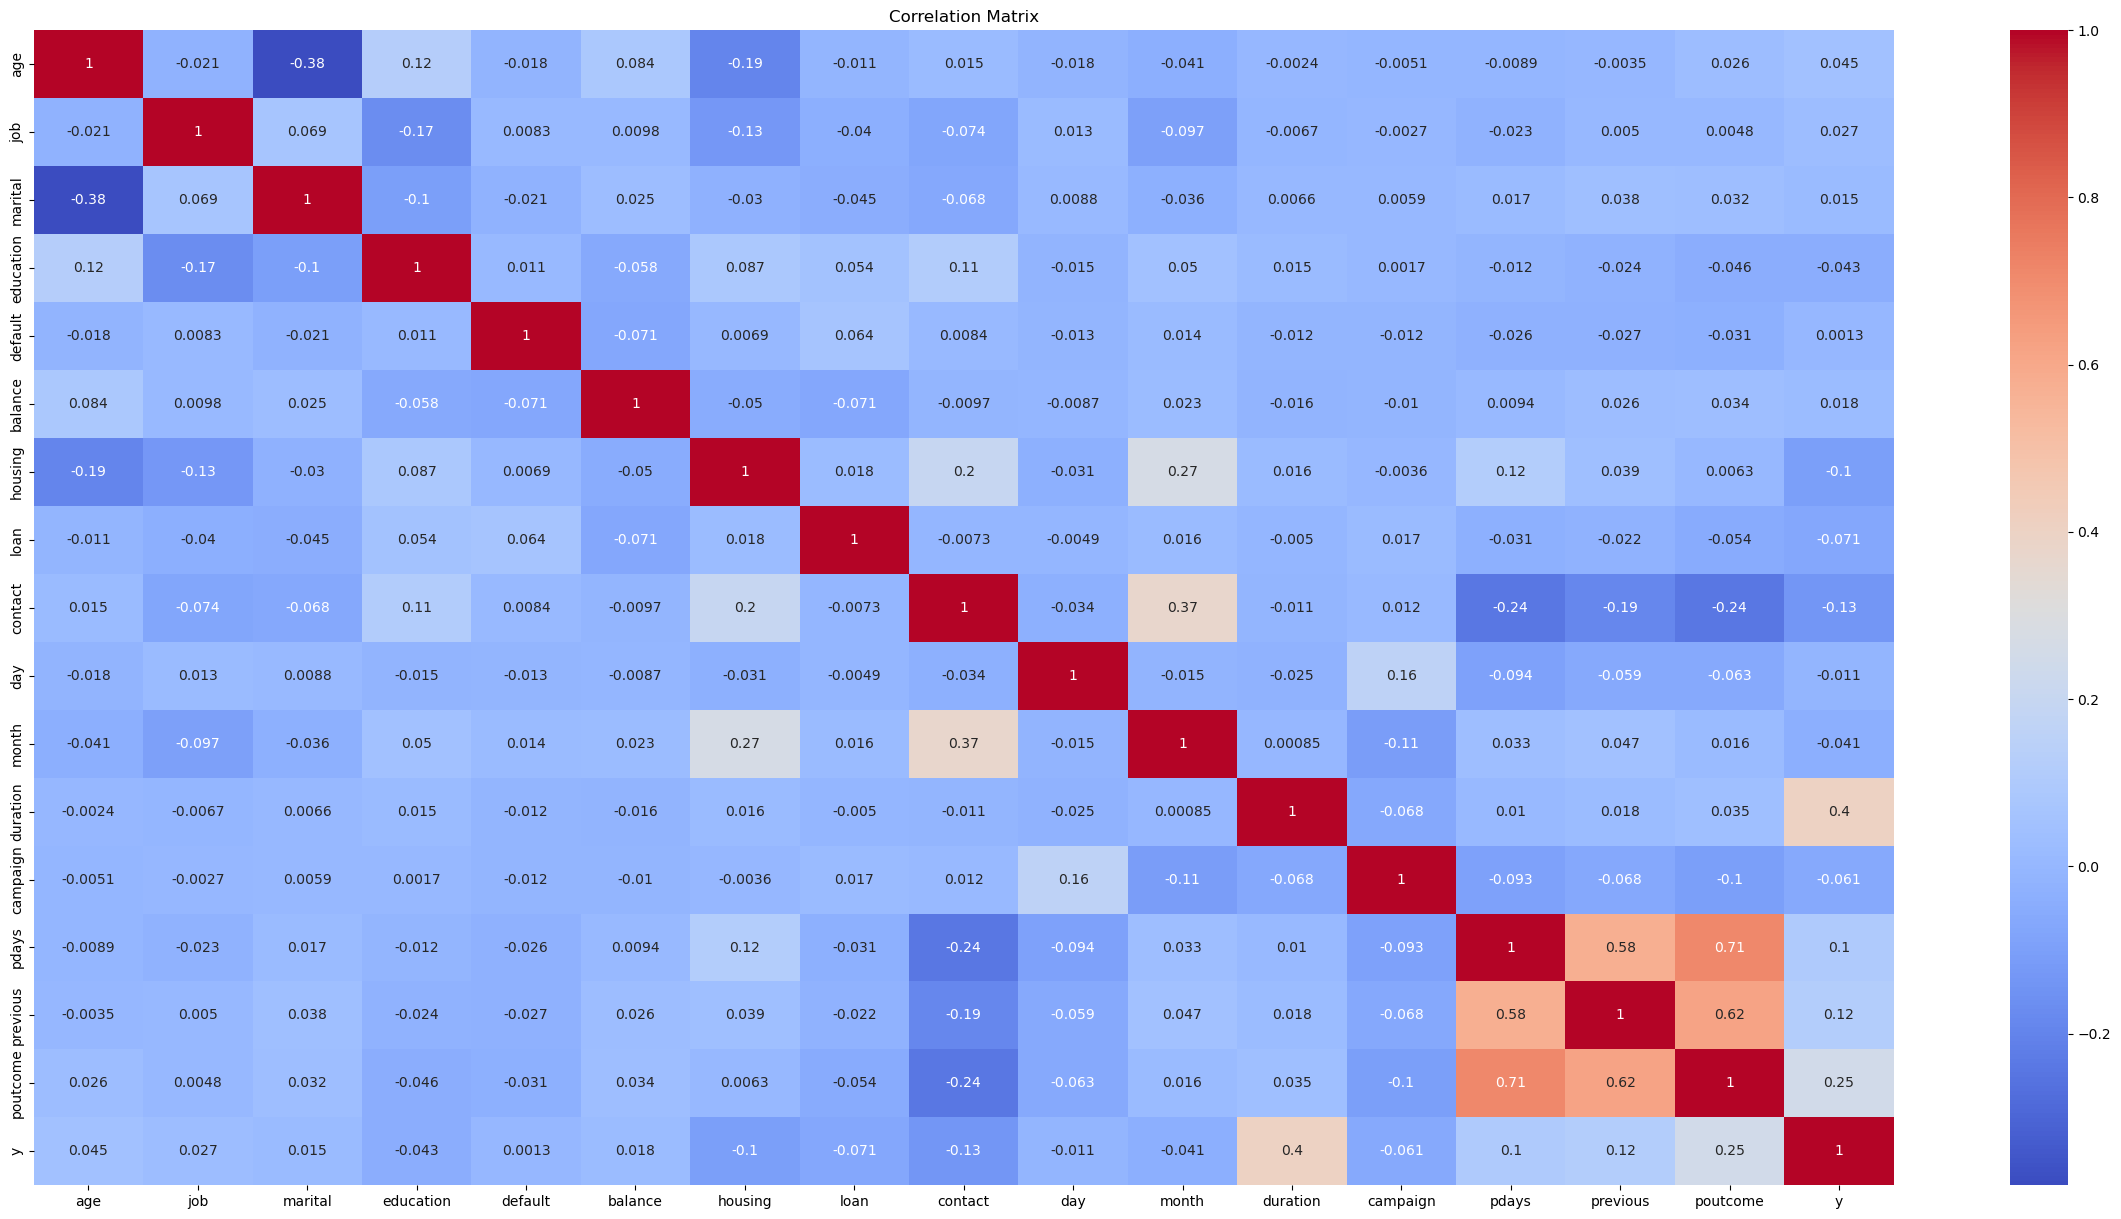

In [72]:
plt.figure(figsize=(30, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Which model performed best overall?
XGBOOST AND RANDOM FOREST PERFORM SAME, AND THE WORST IS DECISION TREE
# Did ensemble methods (RF, XGBoost) improve performance compared to a singleDecision Tree?
yes the prediction is imporoved from the 0.87 to 0.93
# How could the bank use these insights to refine its marketing strategy?
Bank bisa menyaring marketing statergy terbaik dengan menggunakan XGBOOST atau RANDOM FOREST, bisa lebih utama XGBOOST, karena XGBOOST lebih cepat